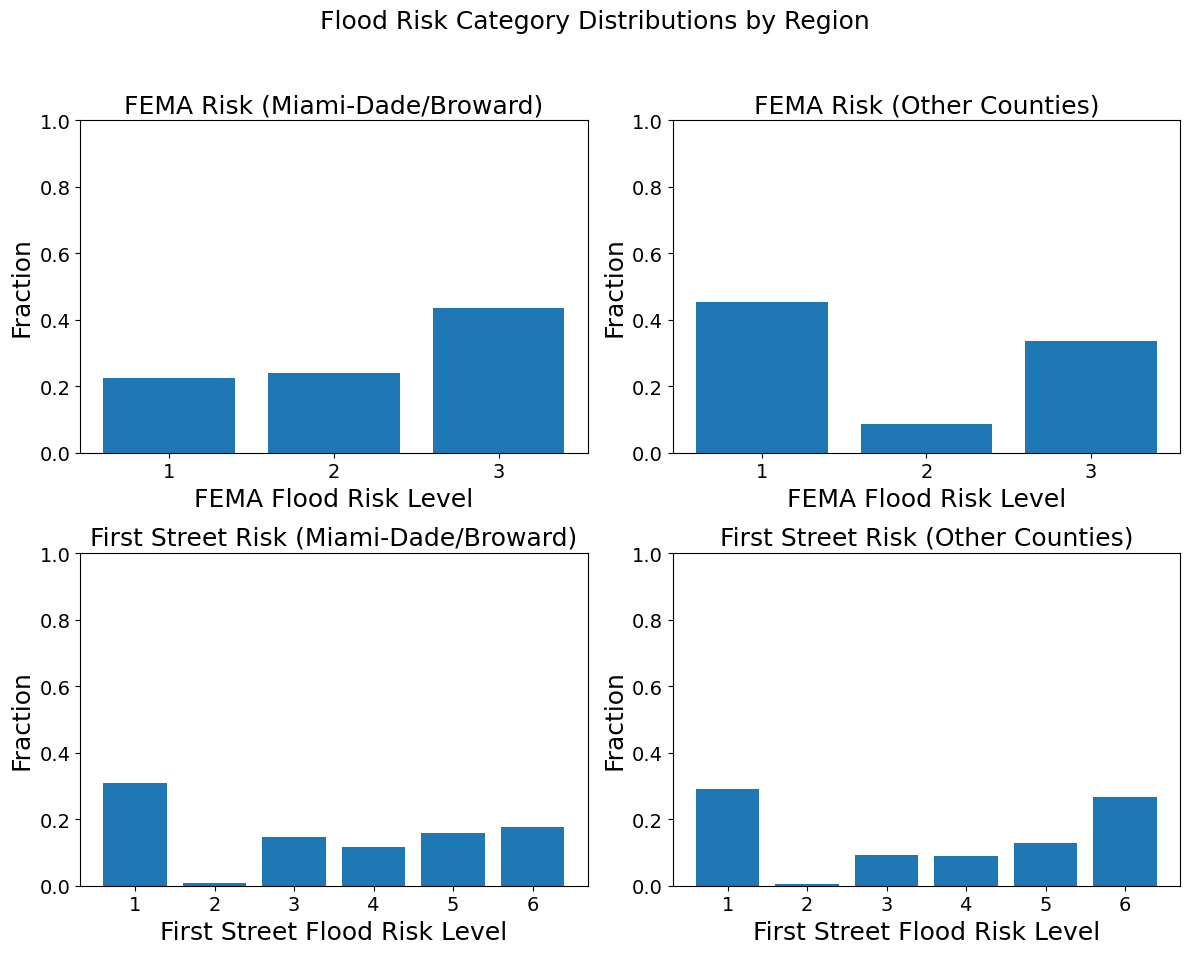

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_stata(r"C:\Users\ngodin\Dropbox\RESEARCH\active_projects\florida_condo\final_datasets\master_datasets\master_dataset_assoc_quarter_redfin.dta")

# Drop duplicate associations
df = df.drop_duplicates(subset='assoc_name_final')

# Create subsets
miami_broward = df[df['mm_fips_county_name_attom'].isin(['MIAMI-DADE', 'BROWARD'])]
other_counties = df[~df['mm_fips_county_name_attom'].isin(['MIAMI-DADE', 'BROWARD'])]

# Function to compute fraction histograms
def plot_fraction_histogram(data, column, ax, title, category_range, xlabel=None):
    counts = data[column].value_counts(dropna=False).sort_index()
    total = counts.sum()
    fractions = (counts / total).reindex(category_range, fill_value=0)
    ax.bar(fractions.index.astype(str), fractions.values)
    ax.set_title(title, fontsize=18)
    ax.set_xlabel(xlabel if xlabel else column, fontsize=18)
    ax.set_ylabel("Fraction", fontsize=18)
    ax.tick_params(axis='both', labelsize=14)  # tick font size
    ax.set_ylim(0, 1)


# Set up subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle("Flood Risk Category Distributions by Region", fontsize=18)

# FEMA Flood Risk: 1-3
plot_fraction_histogram(miami_broward, 'fema_flood_risk_bucket_assoc', axs[0, 0],
                        "FEMA Risk (Miami-Dade/Broward)", category_range=range(1, 4),
                        xlabel="FEMA Flood Risk Level")
plot_fraction_histogram(other_counties, 'fema_flood_risk_bucket_assoc', axs[0, 1],
                        "FEMA Risk (Other Counties)", category_range=range(1, 4),
                        xlabel="FEMA Flood Risk Level")

# First Street Flood Risk: 1-6
plot_fraction_histogram(miami_broward, 'firststreet_risk_cat_assoc', axs[1, 0],
                        "First Street Risk (Miami-Dade/Broward)", category_range=range(1, 7),
                        xlabel="First Street Flood Risk Level")
plot_fraction_histogram(other_counties, 'firststreet_risk_cat_assoc', axs[1, 1],
                        "First Street Risk (Other Counties)", category_range=range(1, 7),
                        xlabel="First Street Flood Risk Level")

# Adjust layout and save
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("flood_risk_histograms_panel.png", dpi=300)
plt.show()
